<a href="https://colab.research.google.com/github/chacacaliza/Malaria-Classification/blob/main/Malaria_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scenario 1 Splitting 75 : 25

In [ ]:
!git clone https://github.com/chacacaliza/Malaria-Classification.git

Cloning into 'Malaria-Classification'...
remote: Enumerating objects: 27571, done.
remote: Counting objects: 100% (27571/27571), done.
remote: Compressing objects: 100% (27570/27570), done.
remote: Total 27571 (delta 1), reused 27565 (delta 0), pack-reused 0
Receiving objects: 100% (27571/27571), 331.87 MiB | 26.90 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (27561/27561), done.


In [ ]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile

TRAIN_DIR = "/content/train/"
TEST_DIR ="/content/test/"

os.mkdir(TRAIN_DIR)
os.mkdir(TEST_DIR)

for label in ['Uninfected', 'Parasitized']:
    os.mkdir(TRAIN_DIR+label)
    os.mkdir(TEST_DIR+label)

In [ ]:
import random
def train_valid_test_split(source, train_dir, test_dir,train_size, test_size):
    # get files
    files = []
    for filename in os.listdir(source):
        file = source + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
    
    # train valid split
    train_size = int(len(files) * (1-train_size))
    test_size = int(len(files) * (train_size))
  
    # shuffle the dataset
    shuffled_files = random.sample(files, len(files))
    
    train_set = shuffled_files[train_size:]
    test_set = shuffled_files[:train_size]
    
    for filename in train_set:
        filepath = source + filename
        destination = train_dir + filename
        copyfile(filepath, destination)    
    
    for filename in test_set:
        filepath = source + filename
        destination = test_dir + filename
        copyfile(filepath, destination)

SOURCE = "/content/Malaria-Classification/Dataset/"

for label in ['Uninfected', 'Parasitized']:
    print(label)
    train_valid_test_split(SOURCE+label+'/', TRAIN_DIR +label+'/', TEST_DIR +label+'/', train_size=0.75, test_size=0.25)
    print(len(os.listdir(TRAIN_DIR +label+'/')))
    print(len(os.listdir(TEST_DIR +label+'/')))

Uninfected
10335
3445
Parasitized
10335
3445


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=45,
        shear_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        )

train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,  
        target_size = (64, 64),
        batch_size=32,
        color_mode='rgb',
        class_mode = 'binary',
        shuffle=True,
        )

Found 20668 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size = (64, 64),
        batch_size=32,
        color_mode='rgb',
        class_mode = 'binary',
        shuffle=True,
)

Found 6890 images belonging to 2 classes.


**RMSprop Optimizer**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# Print model summary
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_5 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
history1 = model1.fit_generator(
        train_generator,
        epochs=100,
        validation_data=test_generator,
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
646/646 [==============================] - 80s 106ms/step - loss: 0.2899 - acc: 0.8891 - val_loss: 0.1699 - val_acc: 0.9367
Epoch 2/100
646/646 [==============================] - 58s 90ms/step - loss: 0.1617 - acc: 0.9476 - val_loss: 0.1358 - val_acc: 0.9541
Epoch 3/100
646/646 [==============================] - 58s 90ms/step - loss: 0.1436 - acc: 0.9526 - val_loss: 0.1493 - val_acc: 0.9466
Epoch 4/100
646/646 [==============================] - 58s 89ms/step - loss: 0.1400 - acc: 0.9538 - val_loss: 0.1324 - val_acc: 0.9591
Epoch 5/100
646/646 [==============================] - 59s 91ms/step - loss: 0.1376 - acc: 0.9551 - val_loss: 0.1740 - val_acc: 0.9392
Epoch 6/100
646/646 [==============================] - 60s 92ms/step - loss: 0.1333 - acc: 0.9555 - val_loss: 0.2502 - val_acc: 0.9248
Epoch 7/100
646/646 [==============================] - 58s 90ms/step - loss: 0.1273 - acc: 0.9568 - val_loss: 0.1191 - val_acc: 0.9579
Epoch 8/100
646/646 [==============================] -

In [ ]:
model1.evaluate_generator(test_generator, verbose=1)

  1/216 [..............................] - ETA: 16s - loss: 0.1202 - acc: 0.9688

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


216/216 [==============================] - 8s 37ms/step - loss: 0.0994 - acc: 0.9701


[0.0993586853146553, 0.9701015949249268]

In [ ]:
print("Train Accuracy : ")
model1.evaluate(train_generator)

Train Accuracy : 
646/646 [==============================] - 49s 76ms/step - loss: 0.0766 - acc: 0.9740


[0.07663412392139435, 0.9740177989006042]

In [ ]:
print("Test Accuracy : ")
model1.evaluate(test_generator)

Test Accuracy : 
216/216 [==============================] - 8s 37ms/step - loss: 0.0994 - acc: 0.9701


[0.09935867786407471, 0.9701015949249268]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model1):
  test_generator = test_datagen.flow_from_directory(
      TEST_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='binary',
      shuffle = False)

  Y_pred = model1.predict_generator(test_generator)
  y_pred = np.round(Y_pred).astype(int)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(test_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.yticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['Parasitized','Uninfected']
  print(classification_report(test_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("F-1 Score of the model is {:.2f}".format(f)) 

Found 6890 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]



Confusion Matrix



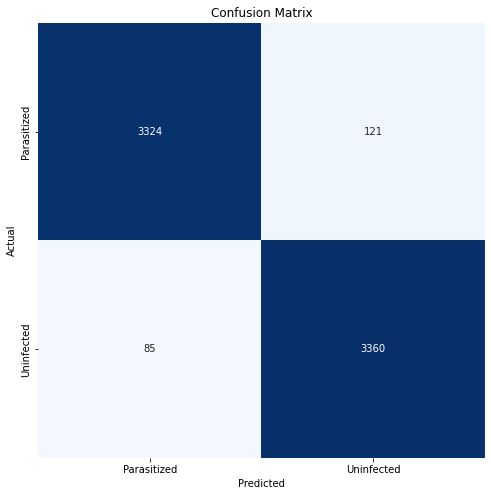



Classification Report

              precision    recall  f1-score   support

 Parasitized       0.98      0.96      0.97      3445
  Uninfected       0.97      0.98      0.97      3445

    accuracy                           0.97      6890
   macro avg       0.97      0.97      0.97      6890
weighted avg       0.97      0.97      0.97      6890

Recall of the model is 0.98
Precision of the model is 0.97
F-1 Score of the model is 0.97


In [ ]:
evaluate(model1)

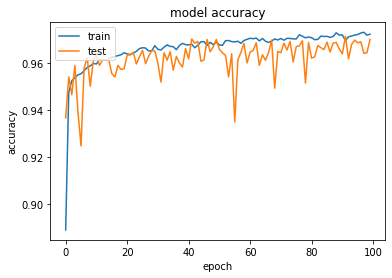

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Accuracy Plot.svg", format="svg", dpi=1200)

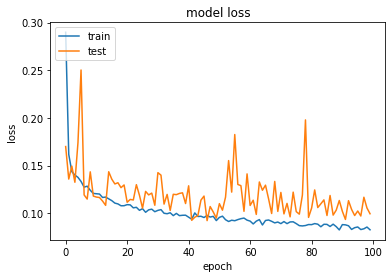

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Loss Plot.svg", format="svg", dpi=1200)

In [ ]:
model1.save_weights("Model1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# serialize model to JSON
model1_json = model1.to_json()
with open("Model1.json", "w") as json_file: json_file.write(model1_json)

In [ ]:
# serialize weights to HDF5
model1.save("Model1.h5")
print("Saved model to disk")

Saved model to disk


**Adam Optimizer**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Print model summary
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
history2 = model2.fit_generator(
        train_generator,
        epochs=100,
        validation_data=test_generator,
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
646/646 [==============================] - 100s 137ms/step - loss: 0.2999 - acc: 0.8760 - val_loss: 0.2047 - val_acc: 0.9248
Epoch 2/100
646/646 [==============================] - 62s 96ms/step - loss: 0.1615 - acc: 0.9451 - val_loss: 0.1392 - val_acc: 0.9524
Epoch 3/100
646/646 [==============================] - 64s 99ms/step - loss: 0.1540 - acc: 0.9475 - val_loss: 0.1414 - val_acc: 0.9554
Epoch 4/100
646/646 [==============================] - 61s 94ms/step - loss: 0.1439 - acc: 0.9522 - val_loss: 0.1282 - val_acc: 0.9572
Epoch 5/100
646/646 [==============================] - 60s 92ms/step - loss: 0.1416 - acc: 0.9516 - val_loss: 0.1393 - val_acc: 0.9514
Epoch 6/100
646/646 [==============================] - 62s 95ms/step - loss: 0.1351 - acc: 0.9553 - val_loss: 0.5649 - val_acc: 0.8010
Epoch 7/100
646/646 [==============================] - 62s 95ms/step - loss: 0.1333 - acc: 0.9536 - val_loss: 0.1449 - val_acc: 0.9524
Epoch 8/100
646/646 [==============================] 

In [ ]:
model2.evaluate_generator(test_generator, verbose=1)

  1/216 [..............................] - ETA: 18s - loss: 0.0818 - acc: 0.9688

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


216/216 [==============================] - 9s 40ms/step - loss: 0.1026 - acc: 0.9666


[0.10256937891244888, 0.9666182994842529]

In [ ]:
print("Train Accuracy : ")
model2.evaluate(train_generator)

Train Accuracy : 
646/646 [==============================] - 51s 79ms/step - loss: 0.0781 - acc: 0.9725


[0.0780971571803093, 0.9724695086479187]

In [ ]:
print("Test Accuracy : ")
model2.evaluate(test_generator)

Test Accuracy : 
216/216 [==============================] - 9s 39ms/step - loss: 0.1026 - acc: 0.9666


[0.10256937891244888, 0.9666182994842529]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model2):
  test_generator = test_datagen.flow_from_directory(
      TEST_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='binary',
      shuffle = False)

  Y_pred = model2.predict_generator(test_generator)
  y_pred = np.round(Y_pred).astype(int)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(test_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.yticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['Parasitized','Uninfected']
  print(classification_report(test_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("F-1 Score of the model is {:.2f}".format(f)) 

Found 6890 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]



Confusion Matrix



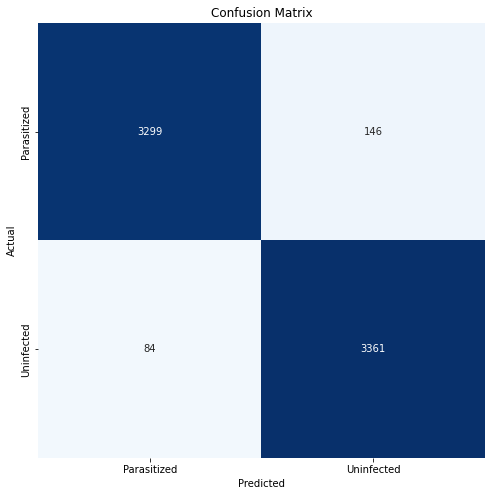



Classification Report

              precision    recall  f1-score   support

 Parasitized       0.98      0.96      0.97      3445
  Uninfected       0.96      0.98      0.97      3445

    accuracy                           0.97      6890
   macro avg       0.97      0.97      0.97      6890
weighted avg       0.97      0.97      0.97      6890

Recall of the model is 0.98
Precision of the model is 0.96
F-1 Score of the model is 0.97


In [ ]:
evaluate(model2)

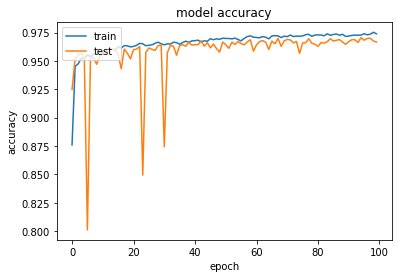

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Accuracy Plot.svg", format="svg", dpi=1200)

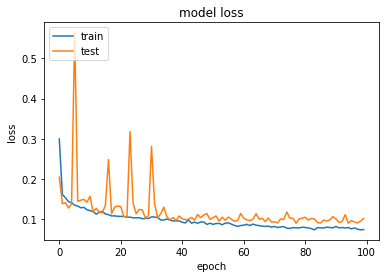

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Loss Plot.svg", format="svg", dpi=1200)

In [ ]:
model2.save_weights("Model2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# serialize model to JSON
model2_json = model2.to_json()
with open("Model2.json", "w") as json_file: json_file.write(model2_json)

In [ ]:
# serialize weights to HDF5
model2.save("Model2.h5")
print("Saved model to disk")

Saved model to disk


**PRE TRAINED MODEL VGG**

In [ ]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetB5
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout, BatchNormalization
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

In [ ]:
classifier_vgg19 = VGG19(input_shape= (64,64,3),include_top=False,weights='imagenet')

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in classifier_vgg19.layers:
    layer.trainable = False

In [ ]:
classifier1 = classifier_vgg19.output#head mode
classifier1 = Flatten()(classifier1)#adding layer of flatten
classifier1 = Dense(units=512, activation='relu')(classifier1)
classifier1 = Dropout(0.2)(classifier1)
classifier1 = BatchNormalization()(classifier1)
classifier1 = Dense(units=1, activation='sigmoid')(classifier1)

model = Model(inputs = classifier_vgg19.input , outputs = classifier1)
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
history1 = model.fit_generator(
        train_generator,
        epochs=100,
        validation_data=test_generator,
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
646/646 [==============================] - 69s 89ms/step - loss: 0.2806 - accuracy: 0.8866 - val_loss: 0.3078 - val_accuracy: 0.8749
Epoch 2/100
646/646 [==============================] - 55s 85ms/step - loss: 0.2301 - accuracy: 0.9106 - val_loss: 0.2447 - val_accuracy: 0.8977
Epoch 3/100
646/646 [==============================] - 54s 84ms/step - loss: 0.2195 - accuracy: 0.9160 - val_loss: 0.2019 - val_accuracy: 0.9287
Epoch 4/100
646/646 [==============================] - 54s 84ms/step - loss: 0.2129 - accuracy: 0.9192 - val_loss: 0.2613 - val_accuracy: 0.8958
Epoch 5/100
646/646 [==============================] - 54s 84ms/step - loss: 0.2157 - accuracy: 0.9171 - val_loss: 0.2118 - val_accuracy: 0.9269
Epoch 6/100
646/646 [==============================] - 54s 84ms/step - loss: 0.2170 - accuracy: 0.9179 - val_loss: 0.2204 - val_accuracy: 0.9144
Epoch 7/100
646/646 [==============================] - 55s 84ms/step - loss: 0.2127 - accuracy: 0.9208 - val_loss: 0.1978 - val_ac

In [ ]:
model.evaluate_generator(test_generator, verbose=1)

  1/216 [..............................] - ETA: 28s - loss: 0.1938 - accuracy: 0.9375

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


216/216 [==============================] - 14s 63ms/step - loss: 0.2108 - accuracy: 0.9303


[0.2108335942029953, 0.9303337931632996]

In [ ]:
print("Train Accuracy : ")
model.evaluate(train_generator)

Train Accuracy : 
646/646 [==============================] - 41s 63ms/step - loss: 0.1230 - accuracy: 0.9601


[0.1230277493596077, 0.9601315855979919]

In [ ]:
print("Test Accuracy : ")
model.evaluate(test_generator)

Test Accuracy : 
216/216 [==============================] - 14s 63ms/step - loss: 0.2108 - accuracy: 0.9303


[0.2108336240053177, 0.9303337931632996]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model2):
  test_generator = test_datagen.flow_from_directory(
      TEST_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='binary',
      shuffle = False)

  Y_pred = model2.predict_generator(test_generator)
  y_pred = np.round(Y_pred).astype(int)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(test_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.yticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['Parasitized','Uninfected']
  print(classification_report(test_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("F-1 Score of the model is {:.2f}".format(f)) 

Found 5510 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]



Confusion Matrix



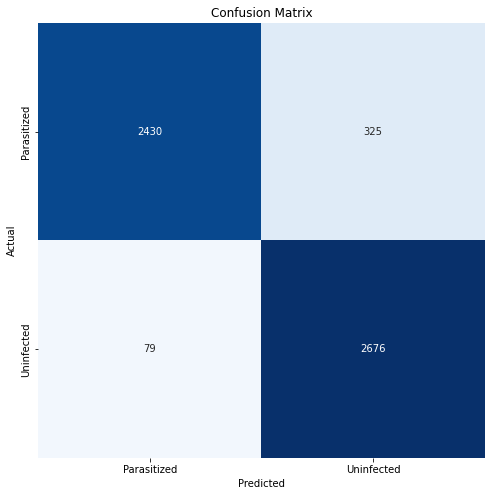



Classification Report

              precision    recall  f1-score   support

 Parasitized       0.97      0.88      0.92      2755
  Uninfected       0.89      0.97      0.93      2755

    accuracy                           0.93      5510
   macro avg       0.93      0.93      0.93      5510
weighted avg       0.93      0.93      0.93      5510

Recall of the model is 0.97
Precision of the model is 0.89
F-1 Score of the model is 0.93


In [ ]:
evaluate(model2)

In [ ]:
import matplotlib.pyplot as plt
def eval_plot(history2):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history2.history['accuracy']
  val_acc = history2.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])
  plt.savefig("Accuracy Plot.svg", format="svg", dpi=1200)

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history2.history['loss']
  val_loss = history2.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])
  plt.savefig("Loss Plot.svg", format="svg", dpi=1200)

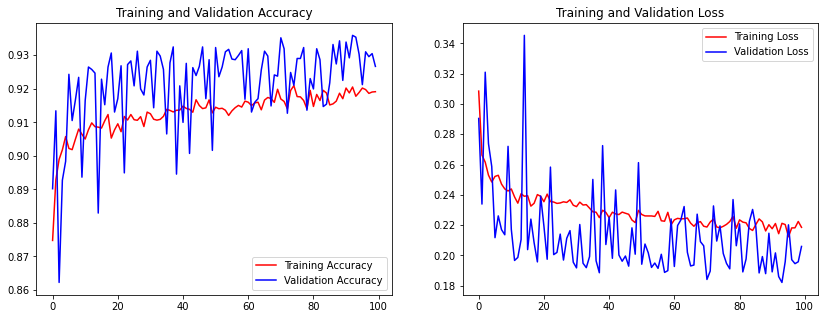

In [ ]:
eval_plot(history2)

In [ ]:
model2.save_weights("Model2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# serialize model to JSON
model2_json = model2.to_json()
with open("Model2.json", "w") as json_file: json_file.write(model2_json)

In [ ]:
# serialize weights to HDF5
model2.save("Model2.h5")
print("Saved model to disk")

Saved model to disk


# Scenario 2 Splitting 80 : 20

In [ ]:
!git clone https://github.com/chacacaliza/Malaria-Classification.git

Cloning into 'Malaria-Classification'...
remote: Enumerating objects: 27571, done.
remote: Counting objects: 100% (27571/27571), done.
remote: Compressing objects: 100% (27570/27570), done.
remote: Total 27571 (delta 1), reused 27565 (delta 0), pack-reused 0
Receiving objects: 100% (27571/27571), 331.87 MiB | 42.72 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (27561/27561), done.


In [ ]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile

TRAIN_DIR = "/content/train/"
TEST_DIR ="/content/test/"

os.mkdir(TRAIN_DIR)
os.mkdir(TEST_DIR)

for label in ['Uninfected', 'Parasitized']:
    os.mkdir(TRAIN_DIR+label)
    os.mkdir(TEST_DIR+label)

In [ ]:
import random
def train_valid_test_split(source, train_dir, test_dir,train_size, test_size):
    # get files
    files = []
    for filename in os.listdir(source):
        file = source + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
    
    # train valid split
    train_size = int(len(files) * (1-train_size))
    test_size = int(len(files) * (train_size))
  
    # shuffle the dataset
    shuffled_files = random.sample(files, len(files))
    
    train_set = shuffled_files[train_size:]
    test_set = shuffled_files[:train_size]
    
    for filename in train_set:
        filepath = source + filename
        destination = train_dir + filename
        copyfile(filepath, destination)    
    
    for filename in test_set:
        filepath = source + filename
        destination = test_dir + filename
        copyfile(filepath, destination)

SOURCE = "/content/Malaria-Classification/Dataset/"

for label in ['Uninfected', 'Parasitized']:
    print(label)
    train_valid_test_split(SOURCE+label+'/', TRAIN_DIR +label+'/', TEST_DIR +label+'/', train_size=0.8, test_size=0.2)
    print(len(os.listdir(TRAIN_DIR +label+'/')))
    print(len(os.listdir(TEST_DIR +label+'/')))

Uninfected
11025
2755
Parasitized
11025
2755


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=45,
        shear_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        )

train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,  
        target_size = (64, 64),
        batch_size=32,
        color_mode='rgb',
        class_mode = 'binary',
        shuffle=True,
        )

Found 22048 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(
      rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size = (64, 64),
        batch_size=32,
        color_mode='rgb',
        class_mode = 'binary',
        shuffle=True,
)

Found 5510 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# Print model summary
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
history1 = model1.fit_generator(
        train_generator,
        epochs=100,
        validation_data=test_generator,
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
689/689 [==============================] - 75s 93ms/step - loss: 0.2972 - acc: 0.8865 - val_loss: 0.1679 - val_acc: 0.9479
Epoch 2/100
689/689 [==============================] - 64s 92ms/step - loss: 0.1593 - acc: 0.9468 - val_loss: 0.1662 - val_acc: 0.9523
Epoch 3/100
689/689 [==============================] - 64s 93ms/step - loss: 0.1459 - acc: 0.9498 - val_loss: 0.1301 - val_acc: 0.9575
Epoch 4/100
689/689 [==============================] - 63s 92ms/step - loss: 0.1435 - acc: 0.9514 - val_loss: 0.1553 - val_acc: 0.9454
Epoch 5/100
689/689 [==============================] - 63s 91ms/step - loss: 0.1368 - acc: 0.9544 - val_loss: 0.1399 - val_acc: 0.9530
Epoch 6/100
689/689 [==============================] - 63s 91ms/step - loss: 0.1330 - acc: 0.9553 - val_loss: 0.1230 - val_acc: 0.9595
Epoch 7/100
689/689 [==============================] - 67s 97ms/step - loss: 0.1301 - acc: 0.9562 - val_loss: 0.1242 - val_acc: 0.9557
Epoch 8/100
689/689 [==============================] - 

In [ ]:
model1.evaluate_generator(test_generator, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


173/173 [==============================] - 7s 42ms/step - loss: 0.1121 - acc: 0.9691


[0.11212174594402313, 0.9691470265388489]

In [ ]:
print("Train Accuracy : ")
model1.evaluate(train_generator)

Train Accuracy : 
689/689 [==============================] - 56s 82ms/step - loss: 0.0960 - acc: 0.9717


[0.09596766531467438, 0.9716981053352356]

In [ ]:
print("Test Accuracy : ")
model1.evaluate(test_generator)

Test Accuracy : 
173/173 [==============================] - 8s 45ms/step - loss: 0.1121 - acc: 0.9691


[0.11212173849344254, 0.9691470265388489]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model1):
  test_generator = test_datagen.flow_from_directory(
      TEST_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='binary',
      shuffle = False)

  Y_pred = model1.predict_generator(test_generator)
  y_pred = np.round(Y_pred).astype(int)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(test_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.yticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['Parasitized','Uninfected']
  print(classification_report(test_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("F-1 Score of the model is {:.2f}".format(f)) 

Found 5510 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]



Confusion Matrix



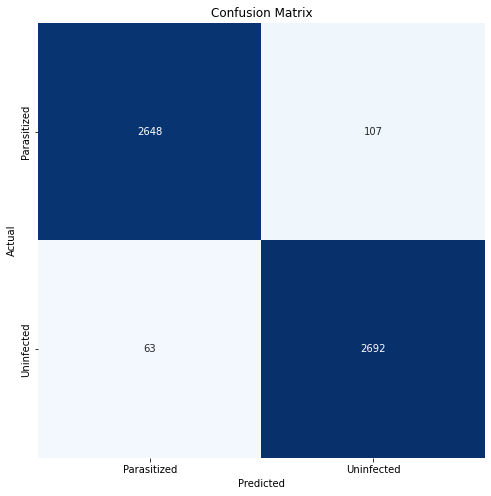



Classification Report

              precision    recall  f1-score   support

 Parasitized       0.98      0.96      0.97      2755
  Uninfected       0.96      0.98      0.97      2755

    accuracy                           0.97      5510
   macro avg       0.97      0.97      0.97      5510
weighted avg       0.97      0.97      0.97      5510

Recall of the model is 0.98
Precision of the model is 0.96
F-1 Score of the model is 0.97


In [ ]:
evaluate(model1)

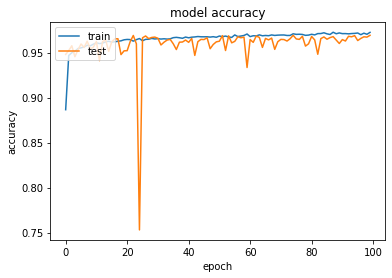

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Accuracy Plot.svg", format="svg", dpi=1200)

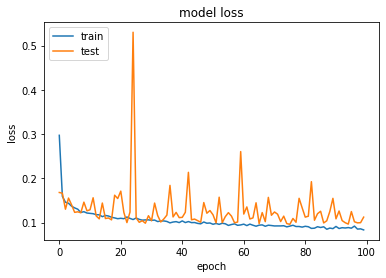

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Loss Plot.svg", format="svg", dpi=1200)

In [ ]:
model1.save_weights("Model1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# serialize model to JSON
model1_json = model1.to_json()
with open("Model1.json", "w") as json_file: json_file.write(model1_json)

In [ ]:
# serialize weights to HDF5
model1.save("Model1.h5")
print("Saved model to disk")

Saved model to disk


**Adam Optimizer**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Print model summary
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_5 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
history2 = model2.fit_generator(
        train_generator,
        epochs=100,
        validation_data=test_generator,
        )

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


689/689 [==============================] - 53s 75ms/step - loss: 0.2634 - acc: 0.8962 - val_loss: 0.1406 - val_acc: 0.9546
Epoch 2/100
689/689 [==============================] - 50s 72ms/step - loss: 0.1547 - acc: 0.9474 - val_loss: 0.1783 - val_acc: 0.9343
Epoch 3/100
689/689 [==============================] - 48s 70ms/step - loss: 0.1470 - acc: 0.9514 - val_loss: 0.2055 - val_acc: 0.9279
Epoch 4/100
689/689 [==============================] - 49s 70ms/step - loss: 0.1441 - acc: 0.9518 - val_loss: 0.1879 - val_acc: 0.9352
Epoch 5/100
689/689 [==============================] - 49s 71ms/step - loss: 0.1351 - acc: 0.9531 - val_loss: 0.1234 - val_acc: 0.9552
Epoch 6/100
689/689 [==============================] - 49s 70ms/step - loss: 0.1325 - acc: 0.9551 - val_loss: 0.1208 - val_acc: 0.9608
Epoch 7/100
689/689 [==============================] - 52s 76ms/step - loss: 0.1308 - acc: 0.9552 - val_loss: 0.1140 - val_acc: 0.9581
Epoch 8/100
689/689 [==============================] - 49s 70ms/ste

In [ ]:
model2.evaluate_generator(test_generator, verbose=1)

  3/173 [..............................] - ETA: 5s - loss: 0.1299 - acc: 0.9792 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


173/173 [==============================] - 5s 31ms/step - loss: 0.0857 - acc: 0.9742


[0.08571338653564453, 0.9742286801338196]

In [ ]:
print("Train Accuracy : ")
model2.evaluate(train_generator)

Train Accuracy : 
689/689 [==============================] - 42s 61ms/step - loss: 0.0720 - acc: 0.9758


[0.07195986807346344, 0.9758254885673523]

In [ ]:
print("Test Accuracy : ")
model2.evaluate(test_generator)

Test Accuracy : 
173/173 [==============================] - 5s 31ms/step - loss: 0.0857 - acc: 0.9742


[0.08571340143680573, 0.9742286801338196]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model2):
  test_generator = test_datagen.flow_from_directory(
      TEST_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='binary',
      shuffle = False)

  Y_pred = model2.predict_generator(test_generator)
  y_pred = np.round(Y_pred).astype(int)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(test_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.yticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['Parasitized','Uninfected']
  print(classification_report(test_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("F-1 Score of the model is {:.2f}".format(f)) 

Found 5510 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]



Confusion Matrix



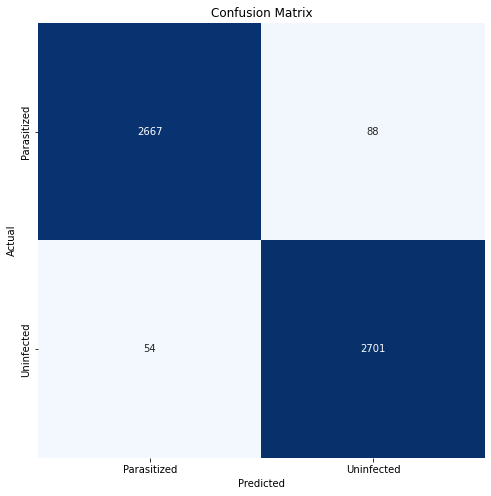



Classification Report

              precision    recall  f1-score   support

 Parasitized       0.98      0.97      0.97      2755
  Uninfected       0.97      0.98      0.97      2755

    accuracy                           0.97      5510
   macro avg       0.97      0.97      0.97      5510
weighted avg       0.97      0.97      0.97      5510

Recall of the model is 0.98
Precision of the model is 0.97
F-1 Score of the model is 0.97


In [ ]:
evaluate(model2)

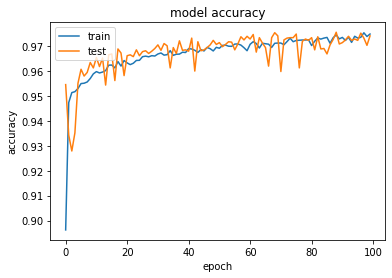

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Accuracy Plot.svg", format="svg", dpi=1200)

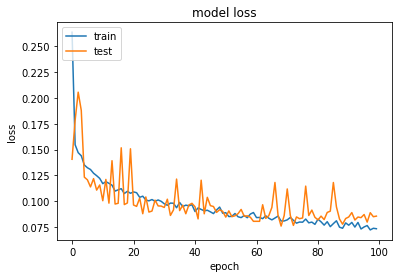

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Loss Plot.svg", format="svg", dpi=1200)

In [ ]:
model2.save_weights("Model2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# serialize model to JSON
model2_json = model2.to_json()
with open("Model2.json", "w") as json_file: json_file.write(model2_json)

In [ ]:
# serialize weights to HDF5
model2.save("Model2.h5")
print("Saved model to disk")

Saved model to disk


**PRETRAINED MODEL VGG - 19**

In [ ]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetB5
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout, BatchNormalization
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

In [ ]:
classifier_vgg19 = VGG19(input_shape= (64,64,3),include_top=False,weights='imagenet')

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in classifier_vgg19.layers:
    layer.trainable = False

In [ ]:
classifier1 = classifier_vgg19.output#head mode
classifier1 = Flatten()(classifier1)#adding layer of flatten
classifier1 = Dense(units=512, activation='relu')(classifier1)
classifier1 = Dropout(0.2)(classifier1)
classifier1 = BatchNormalization()(classifier1)
classifier1 = Dense(units=1, activation='sigmoid')(classifier1)

model2 = Model(inputs = classifier_vgg19.input , outputs = classifier1)
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
history2 = model2.fit_generator(
        train_generator,
        epochs=100,
        validation_data=test_generator,
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
689/689 [==============================] - 101s 127ms/step - loss: 0.3085 - accuracy: 0.8748 - val_loss: 0.2904 - val_accuracy: 0.8902
Epoch 2/100
689/689 [==============================] - 77s 111ms/step - loss: 0.2662 - accuracy: 0.8929 - val_loss: 0.2339 - val_accuracy: 0.9134
Epoch 3/100
689/689 [==============================] - 76s 110ms/step - loss: 0.2616 - accuracy: 0.8989 - val_loss: 0.3210 - val_accuracy: 0.8623
Epoch 4/100
689/689 [==============================] - 75s 109ms/step - loss: 0.2530 - accuracy: 0.9018 - val_loss: 0.2738 - val_accuracy: 0.8927
Epoch 5/100
689/689 [==============================] - 75s 109ms/step - loss: 0.2485 - accuracy: 0.9058 - val_loss: 0.2587 - val_accuracy: 0.8984
Epoch 6/100
689/689 [==============================] - 74s 108ms/step - loss: 0.2521 - accuracy: 0.9022 - val_loss: 0.2117 - val_accuracy: 0.9243
Epoch 7/100
689/689 [==============================] - 75s 109ms/step - loss: 0.2529 - accuracy: 0.9019 - val_loss: 0.2261 

In [ ]:
model2.evaluate_generator(test_generator, verbose=1)

  1/173 [..............................] - ETA: 19s - loss: 0.3204 - accuracy: 0.8438

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


173/173 [==============================] - 9s 54ms/step - loss: 0.2059 - accuracy: 0.9267


[0.20592100918293, 0.9266787767410278]

In [ ]:
print("Train Accuracy : ")
model2.evaluate(train_generator)

Train Accuracy : 
689/689 [==============================] - 67s 97ms/step - loss: 0.1925 - accuracy: 0.9316


[0.1925080269575119, 0.9315584301948547]

In [ ]:
print("Test Accuracy : ")
model2.evaluate(test_generator)

Test Accuracy : 
173/173 [==============================] - 9s 54ms/step - loss: 0.2059 - accuracy: 0.9267


[0.20592111349105835, 0.9266787767410278]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model2):
  test_generator = test_datagen.flow_from_directory(
      TEST_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='binary',
      shuffle = False)

  Y_pred = model2.predict_generator(test_generator)
  y_pred = np.round(Y_pred).astype(int)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(test_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.yticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['Parasitized','Uninfected']
  print(classification_report(test_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("F-1 Score of the model is {:.2f}".format(f)) 

Found 5510 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]



Confusion Matrix



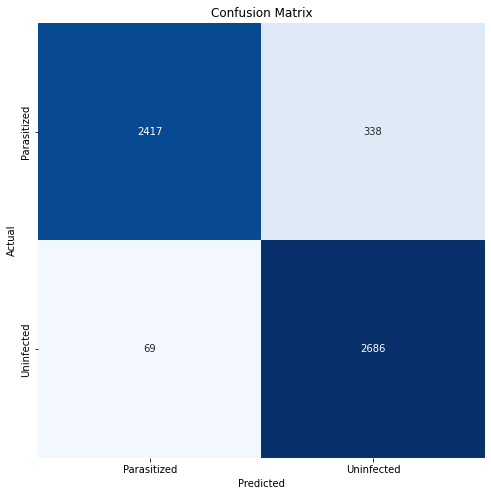



Classification Report

              precision    recall  f1-score   support

 Parasitized       0.97      0.88      0.92      2755
  Uninfected       0.89      0.97      0.93      2755

    accuracy                           0.93      5510
   macro avg       0.93      0.93      0.93      5510
weighted avg       0.93      0.93      0.93      5510

Recall of the model is 0.97
Precision of the model is 0.89
F-1 Score of the model is 0.93


In [ ]:
evaluate(model2)

In [ ]:
import matplotlib.pyplot as plt
def eval_plot(history2):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history2.history['accuracy']
  val_acc = history2.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])
  plt.savefig("Accuracy Plot.svg", format="svg", dpi=1200)

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history2.history['loss']
  val_loss = history2.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])
  plt.savefig("Loss Plot.svg", format="svg", dpi=1200)

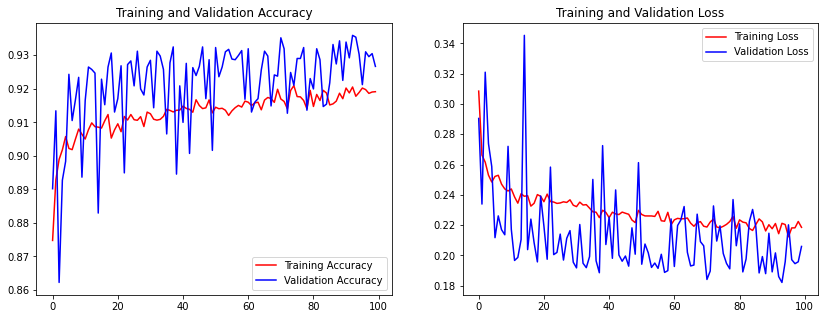

In [ ]:
eval_plot(history2)

In [ ]:
model.save_weights("Model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("Model2.json", "w") as json_file: json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
model.save("Model.h5")
print("Saved model to disk")

Saved model to disk
